In [5]:
import healpy as h

%pylab notebook
import time

Populating the interactive namespace from numpy and matplotlib


In [278]:
cltemp=h.read_cl("../../data/cl_rem3.fits")
clr=[cltemp[0],cltemp[1],cltemp[2],cltemp[3]*0]

In [279]:
nside=32 ; lmax=2*nside ; npix=h.nside2npix(nside)
random.seed(0) ; tqu=h.synfast(clr,nside,lmax=lmax,mmax=lmax,pol=True,new=True,verbose=False)

In [318]:
clteb0=h.alm2cl(h.map2alm(tqu,lmax,iter=0))
clteb1=h.alm2cl(h.map2alm(tqu,lmax,iter=1))
clteb2=h.alm2cl(h.map2alm(tqu,lmax,iter=2))
clteb3=h.alm2cl(h.map2alm(tqu,lmax,iter=3))
clteb4=h.alm2cl(h.map2alm(tqu,lmax,iter=4))

<IPython.core.display.Javascript object>


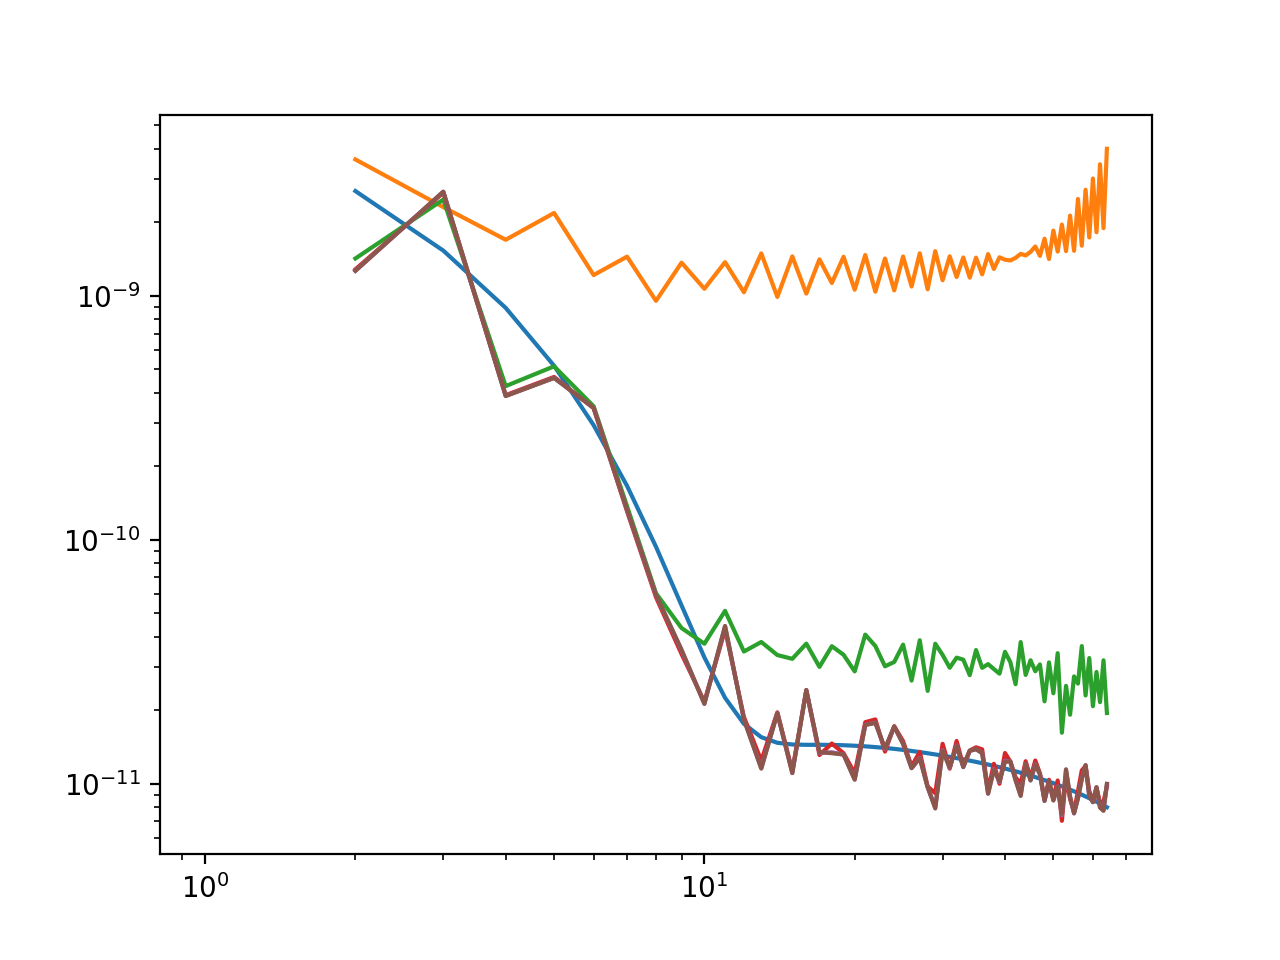

[]

In [319]:
figure()
plot(clr[2][:lmax+1])
plot(clteb0[2])
plot(clteb1[2])
plot(clteb2[2])
plot(clteb3[2])
plot(clteb4[2])
loglog()

In [320]:
tqup=h.alm2map(h.map2alm(tqu,lmax=lmax,iter=1),nside)
ctqu1=[tqup[0]-tqu[0],tqup[1]-tqu[1],tqup[2]-tqu[2]]

ctqup=h.alm2map(h.map2alm(ctqu1,lmax=lmax,iter=1),nside)
ctqu2=[ctqup[0]-ctqu1[0],ctqup[1]-ctqu1[1],ctqup[2]-ctqu1[2]]

tquc=[tqu[0]-ctqu1[0],tqu[1]-ctqu1[1],tqu[2]-ctqu1[2]]

teb2=h.alm2map(h.map2alm(tquc,lmax=lmax,iter=1),nside,pol=False)
teb=h.alm2map(h.map2alm(tqu,lmax=lmax,iter=1),nside,pol=False)
cteb=h.alm2map(h.map2alm(ctqu1,lmax=lmax,iter=1),nside,pol=False)
cteb1=h.alm2map(h.map2alm(ctqu2,lmax=lmax,iter=1),nside,pol=False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


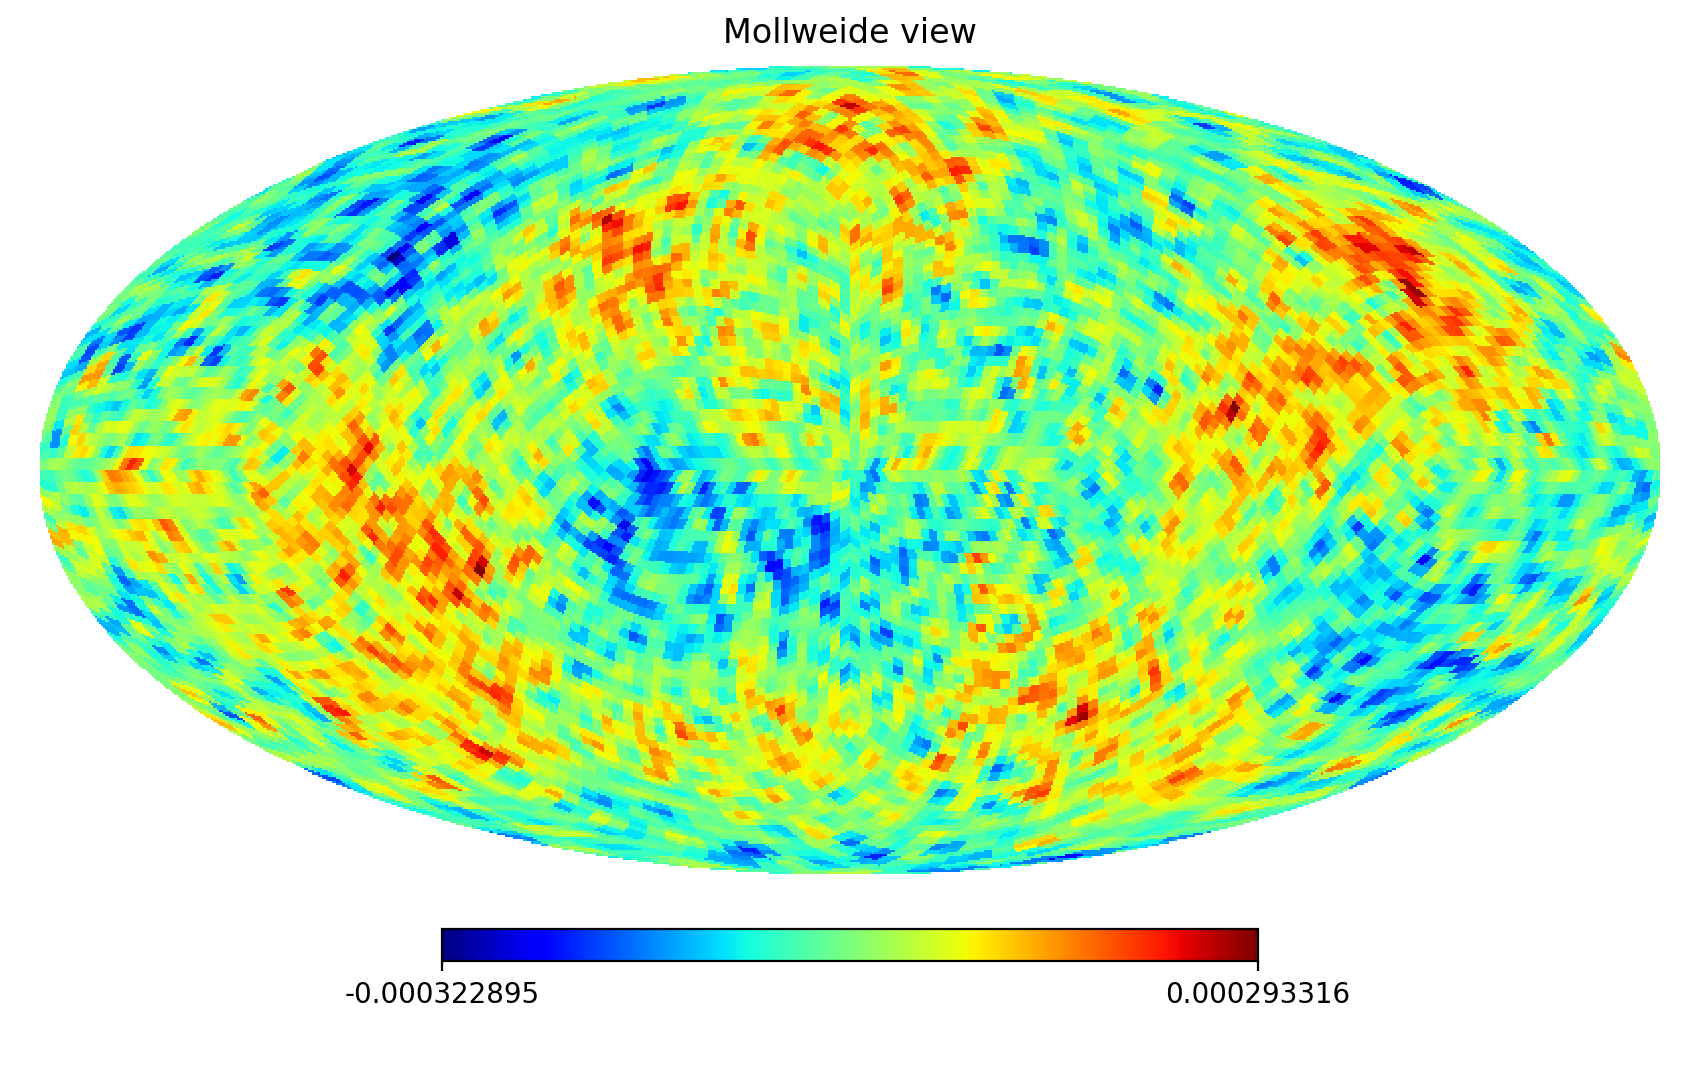

<IPython.core.display.Javascript object>


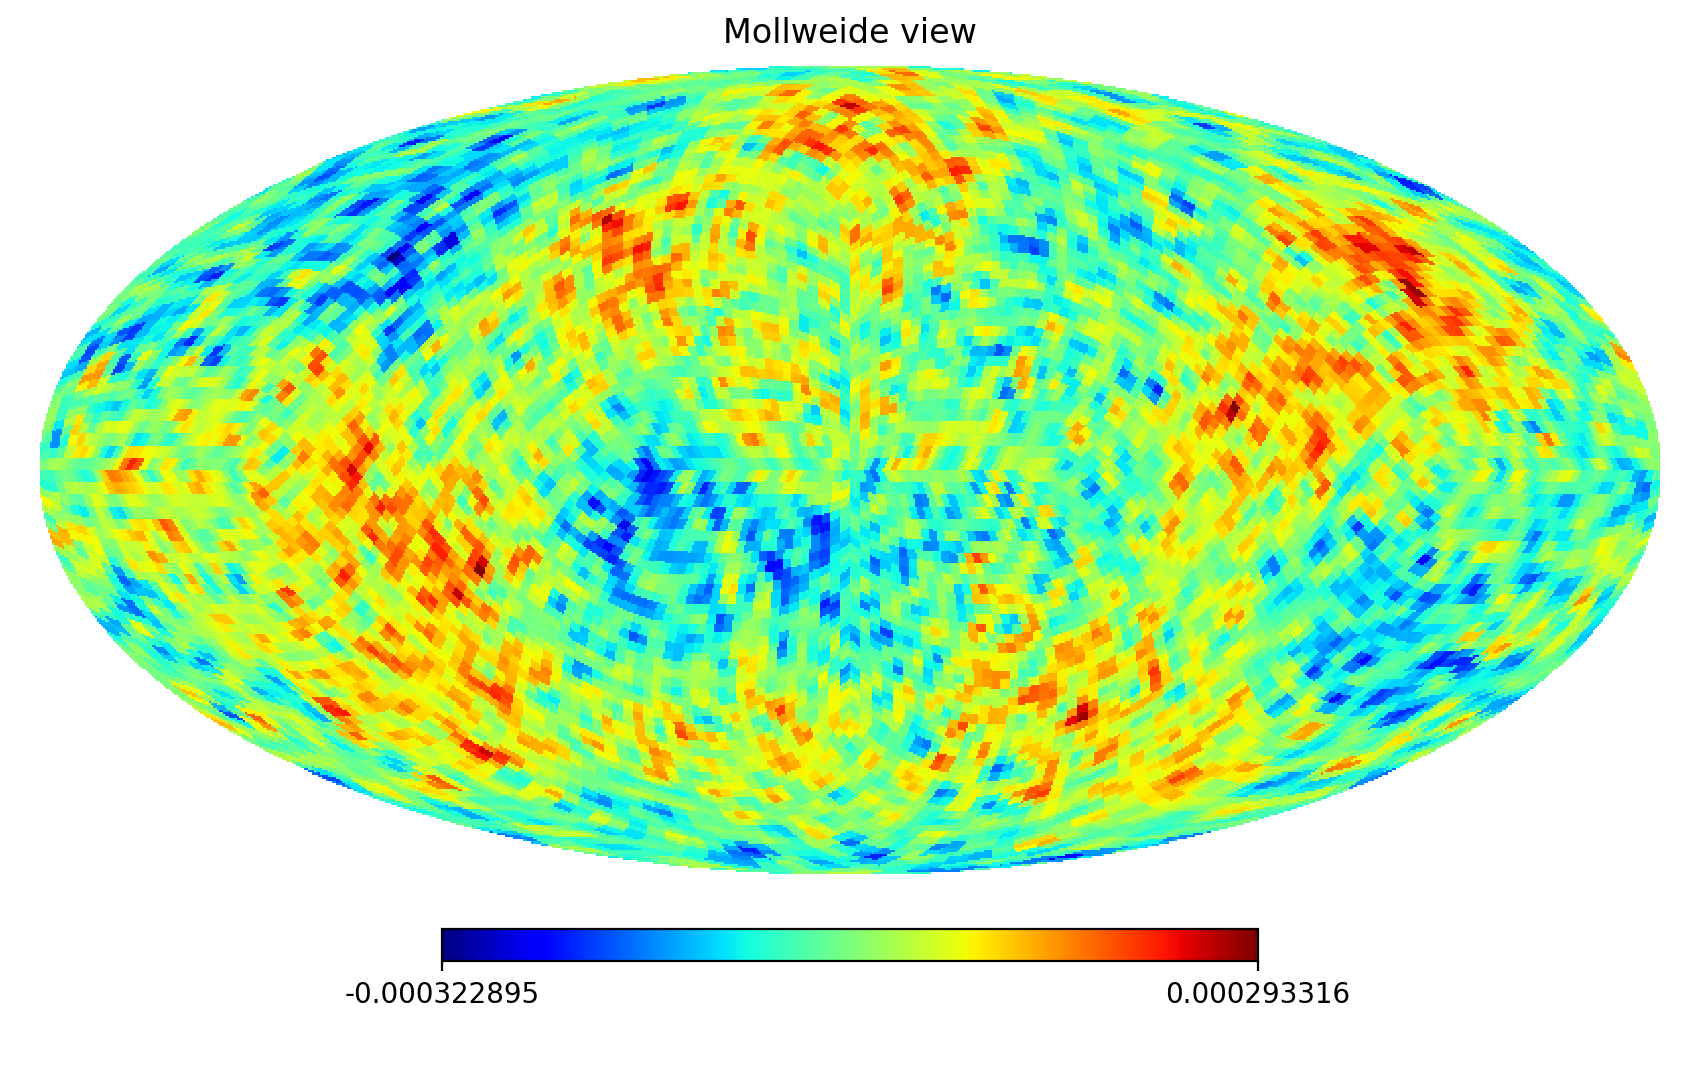

<IPython.core.display.Javascript object>


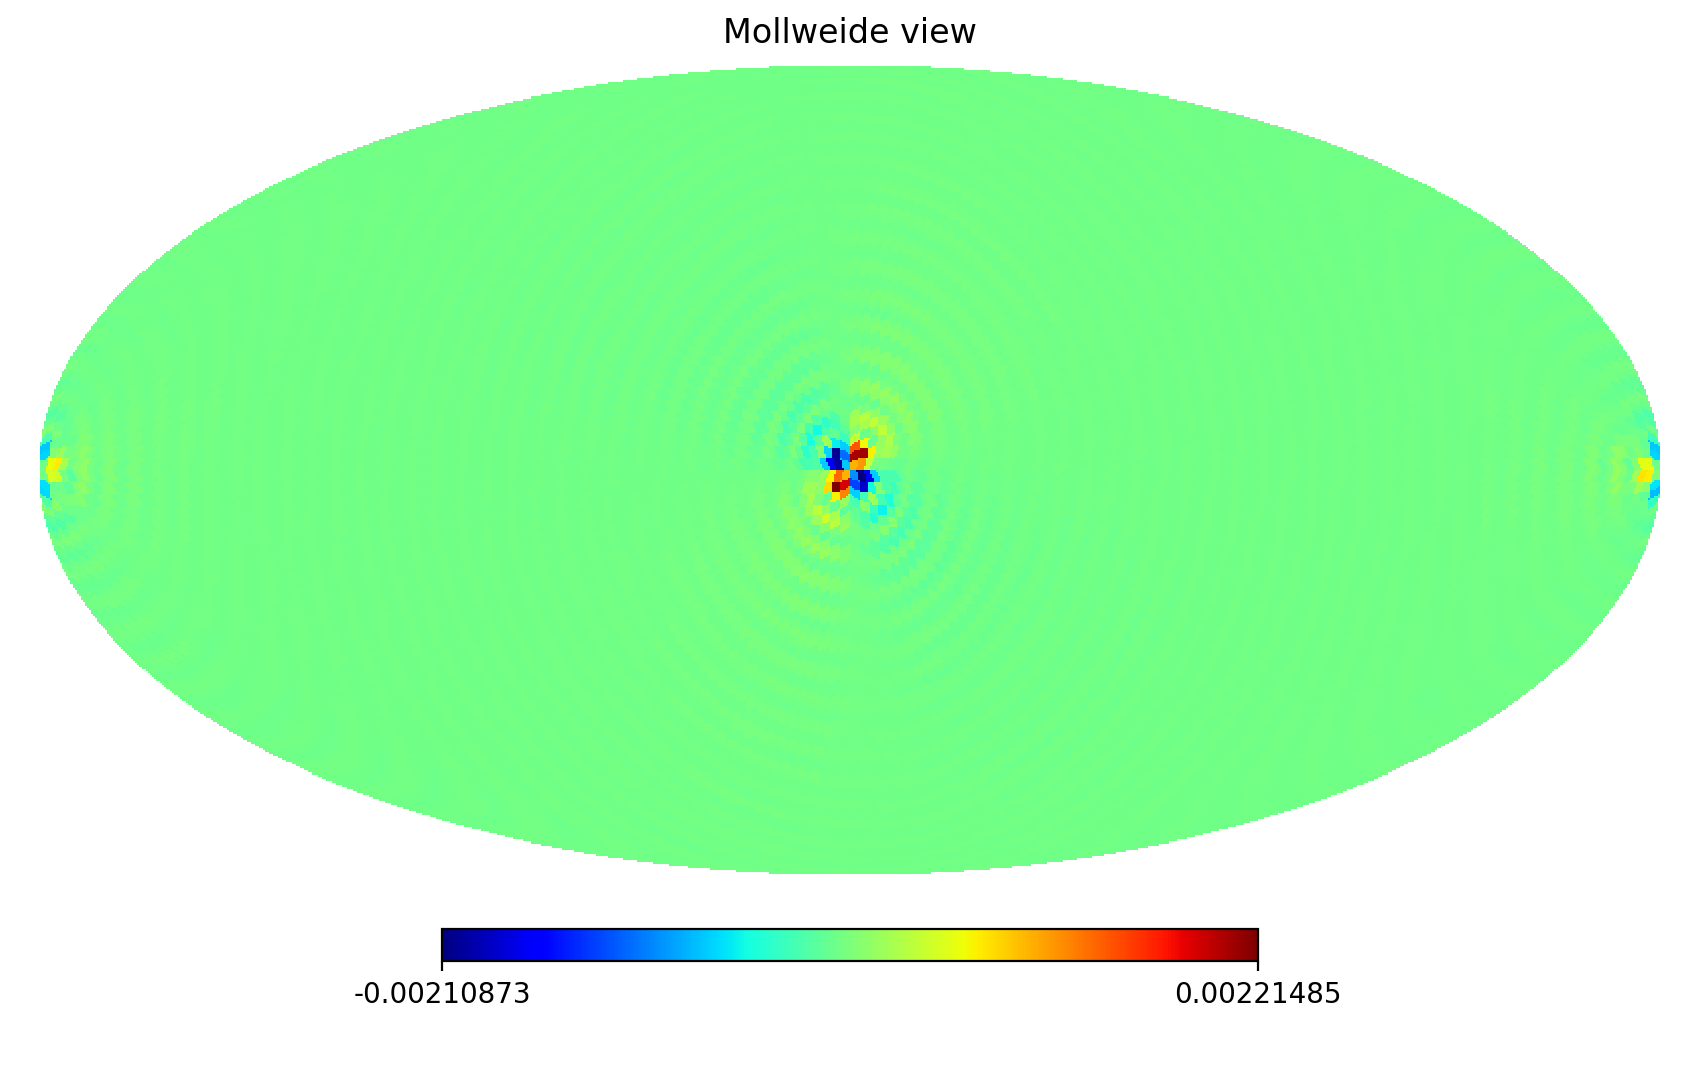

<IPython.core.display.Javascript object>


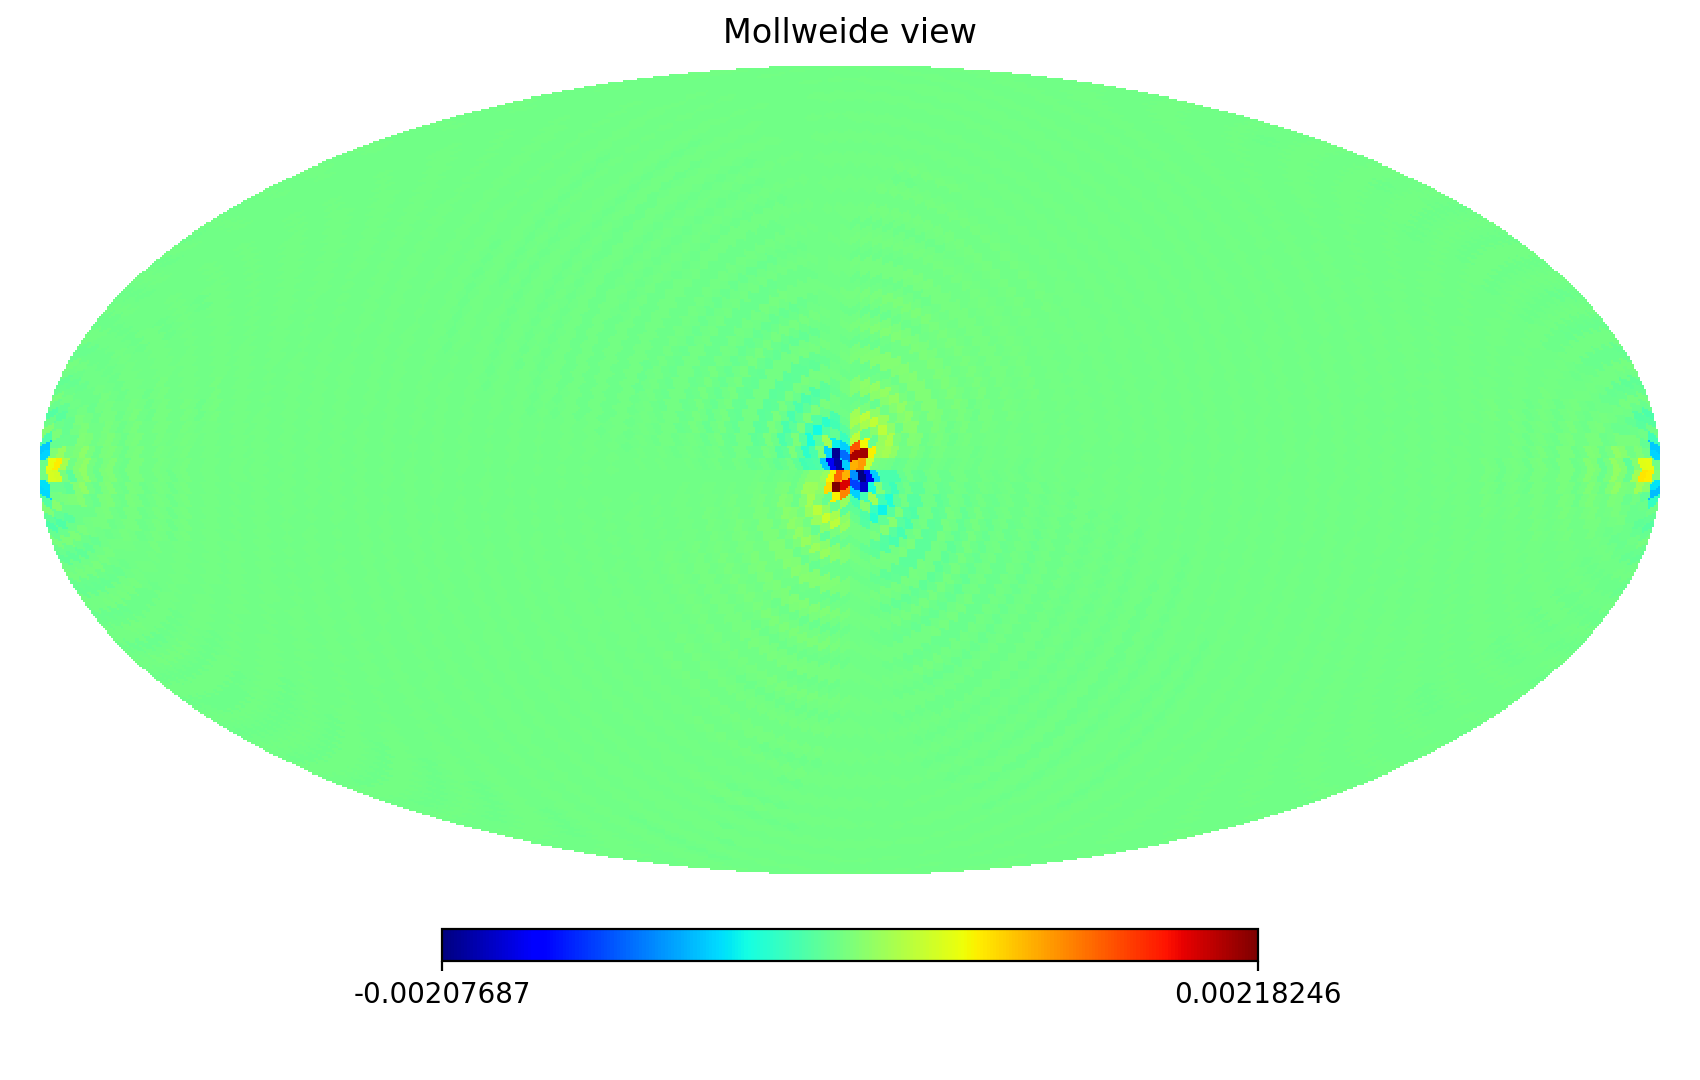

In [323]:
h.mollview(teb[2]-cteb[2],rot=(0,90))
h.mollview(teb2[2],rot=(0,90))
h.mollview(cteb[2],rot=(0,90))
h.mollview(cteb[2] + cteb1[2],rot=(0,90))

<IPython.core.display.Javascript object>


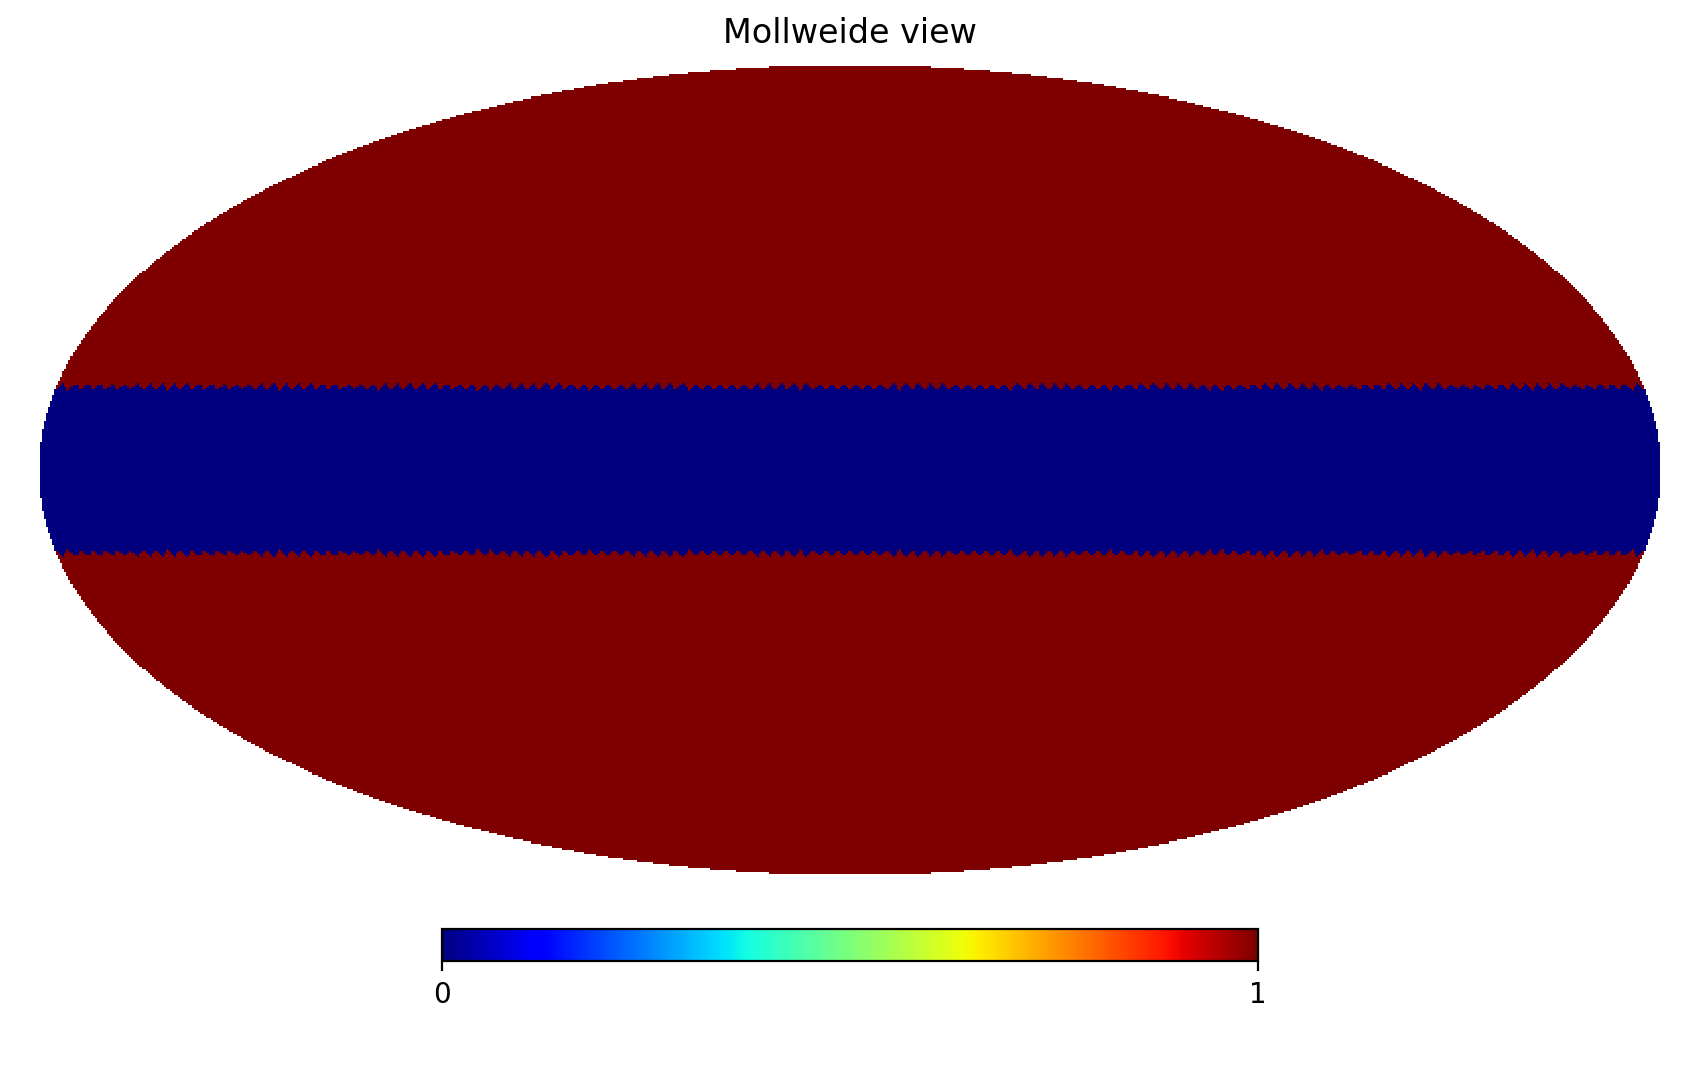

In [125]:
lat=90
tmask=zeros(npix,float)
pmask=zeros(npix,float)
pindex=arange(npix)
theta0,phi0=h.pix2ang(nside,pindex)
theta0=theta0*180/pi ; phi0=phi0*180/pi
wband=15 ; phiband=0
tmask[theta0<lat-wband]=1 ; tmask[theta0>lat+wband]=1.
pmask[phi0<phiband]=1. ; pmask[phi0>360-phiband]=1.
pmask[:]=1.
mask=tmask ; fsky=sum(mask)/size(mask)
#mask[:]=1.
h.mollview(mask)

In [126]:
cl=h.alm2cl(h.map2alm(tqu,lmax=lmax,iter=3))
clp=h.alm2cl(h.map2alm(tqu*mask,lmax=lmax,iter=3))

<IPython.core.display.Javascript object>


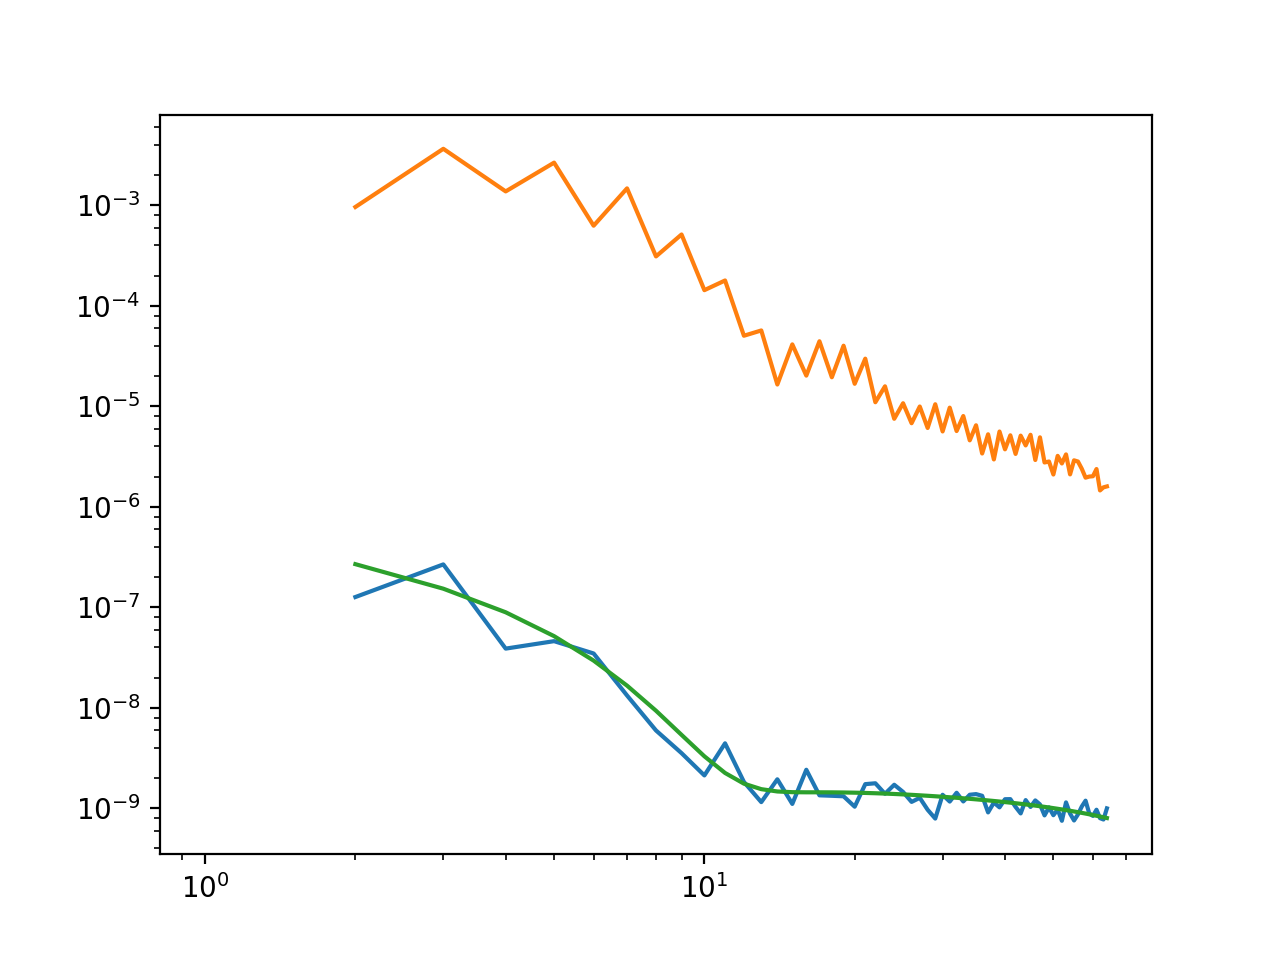

[]

In [127]:
figure()
plot(cl[2])
plot(clp[2])
plot(clr[2][:lmax+1])
loglog()

In [260]:
tqup=[zeros(npix,"double"),zeros(npix,"double"),zeros(npix,"double")]

In [ ]:
tqup=h.alm2map(h.map2alm(tqu,lmax=lmax,iter=1),nside)
teb=h.alm2map(h.map2alm())

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


<IPython.core.display.Javascript object>


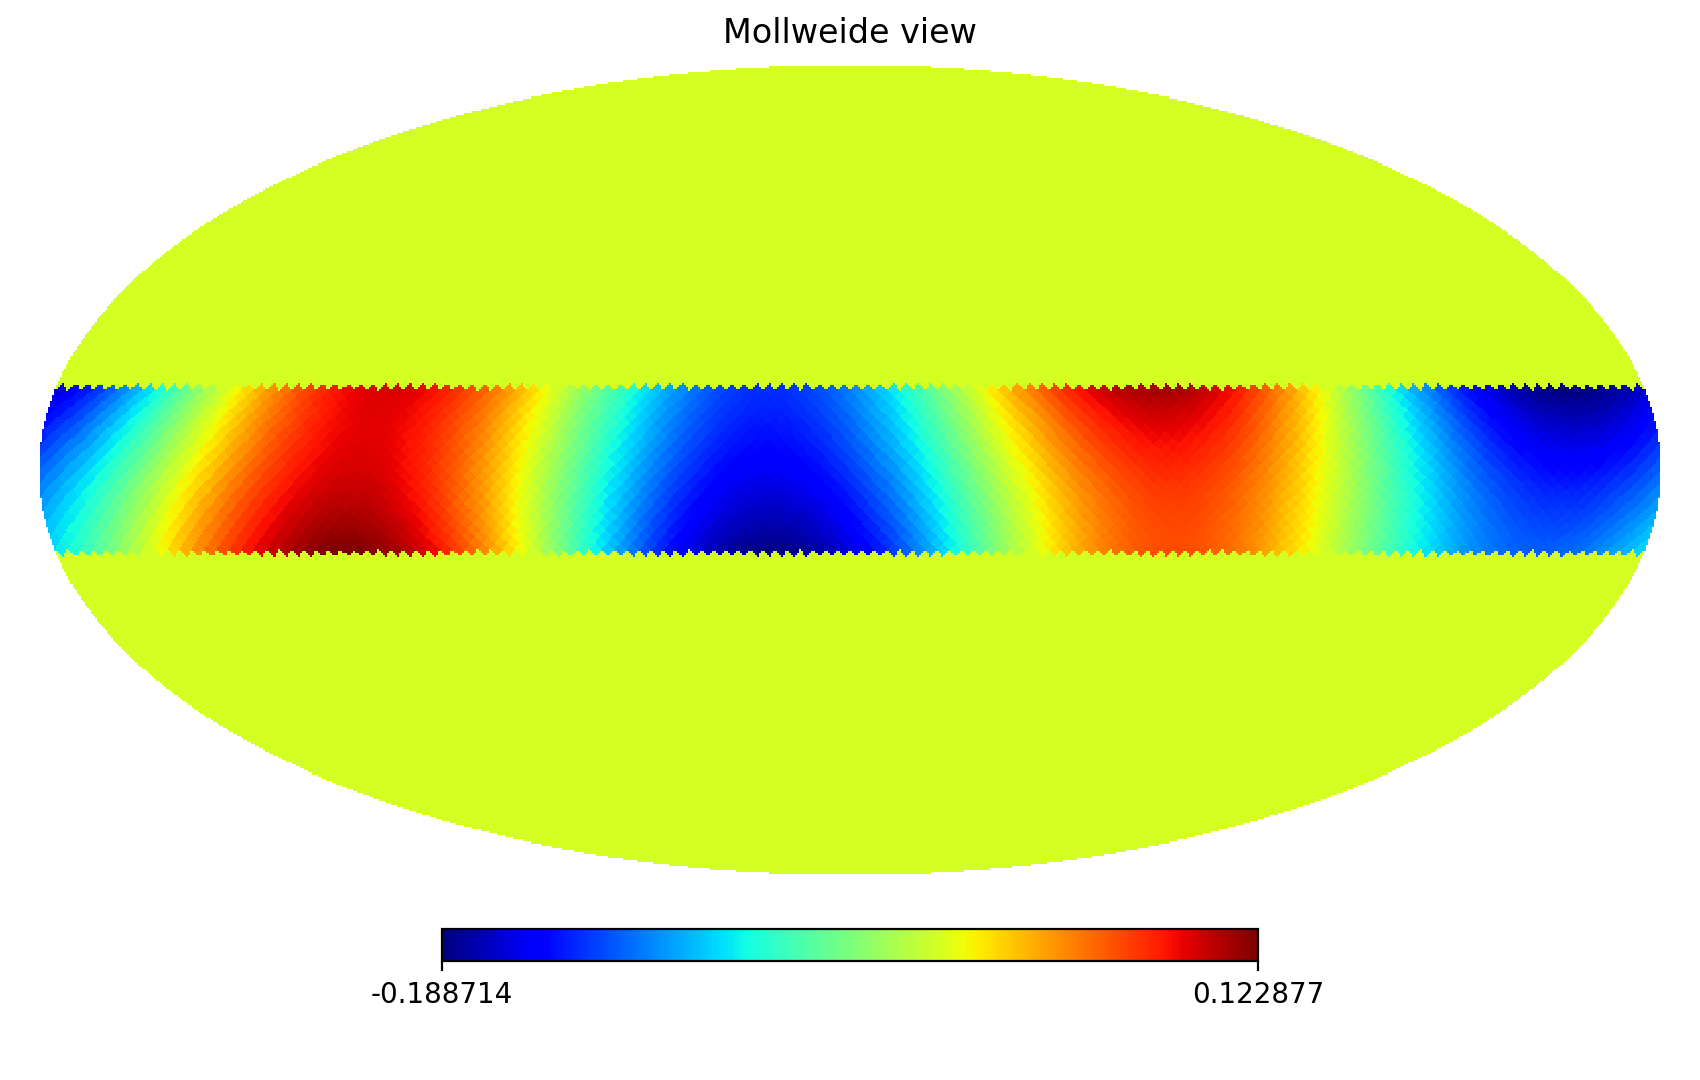

In [267]:
data=tqu*mask + tqup*(1-mask)
plmax=2
tqup=h.alm2map(h.map2alm(data,lmax=plmax,iter=3),nside)
h.mollview((data[1]-tqu[1]*mask))

In [254]:
cld=h.alm2cl(h.map2alm(data,lmax=lmax))

<IPython.core.display.Javascript object>


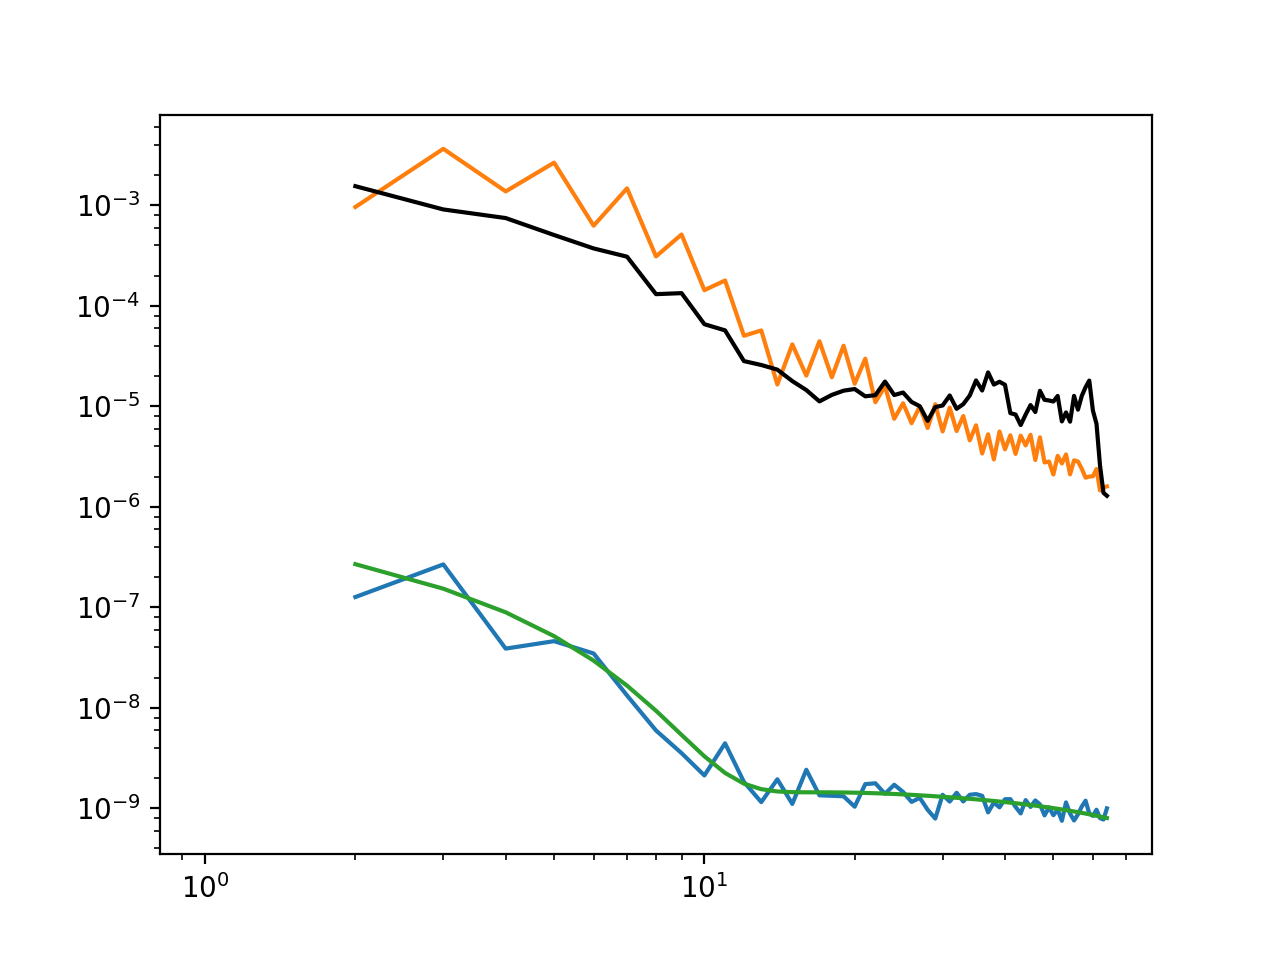

[]

In [255]:
figure()
plot(cl[2])
plot(clp[2])
plot(cld[2],"k")
plot(clr[2][:lmax+1])
loglog()